In [49]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [50]:
df = pd.read_csv("../data/all_event_data.csv")

In [51]:
# In the new data file many of the workshops have 'NA' at event_id. This should be 'NLeSc'
df["org_id"].fillna("NLeSc", inplace = True)

In [52]:
# test with plotly example

df_tips = px.data.tips()

In [64]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
fig = px.sunburst(df_tips, path=['day', 'sex'], 
                  values='total_bill', color='total_bill')
fig.show()

In [55]:
# select only digital skills events and exclude NLeSc participants

# filter out escience employees
df_external = df[df['affiliation'] != 'ESCIENCE CENTER']
df_external['affiliation'].value_counts()

TU DELFT                                    103
UVA                                          93
UTRECHT UNIVERSITY                           77
VU AMSTERDAM                                 60
WAGENINGEN UNIVERSITY                        48
                                           ... 
RWTH AACHEN                                   1
LA SAPIENZA UNIVERSITY                        1
AMSTERDAM UNIVERSITY OF APPLIED SCIENCES      1
UNIVERSITY OF MICHIGAN                        1
ROBOVALLEY                                    1
Name: affiliation, Length: 85, dtype: int64

In [56]:
# select digital skills events only

# only escience events
df_escience = df_external[(df_external['org_id'] == 'NLeSc') | (df_external['org_id'] == 'ePlan')]

# filter out the escience symposia
df_digitalskills = df_escience[df_escience['event'].str.contains('Symposium') == False]

# filter out the workshop on software management plans
df_digitalskills = df_digitalskills[df_digitalskills['event'].str.contains('Software Management Plans') == False]

df_digitalskills['org_id'].value_counts()

NLeSc    776
ePlan     35
Name: org_id, dtype: int64

In [57]:
# Create df with sections and disciplines

df_disc = df_digitalskills.groupby(['NLeScdis', 'dis1']).agg({'order_id': 'count'}).reset_index()
df_disc.rename(columns = {'order_id': 'participants'}, inplace = True)
df_disc.head()

# disciplinary classification is weird because of the many discipline columns so skipping this for now

,NLeScdis,dis1,participants
0,LS,Agricultural or Environmental Sciences,19
1,LS,Biomedical or Health Sciences,65
2,LS,Chemistry,4
3,LS,Computer Science or Electrical Engineering,3
4,LS,"Genetics, Genomics or Bioinformatics",2


In [58]:
# Create df with participants by disciplinary section
# quite a lot of missing data but that's because of the eventbrite forms of some of the events

df_participants_by_section = pd.DataFrame(df_digitalskills['NLeScdis'].value_counts())
df_participants_by_section.reset_index (inplace = True)
df_participants_by_section.rename(columns = {'index': 'disciplinary section', 'NLeScdis': 'participants'}, inplace = True)
df_participants_by_section.head()

,disciplinary section,participants
0,Ph&B,215
1,LS,153
2,SSH,85
3,SE,68


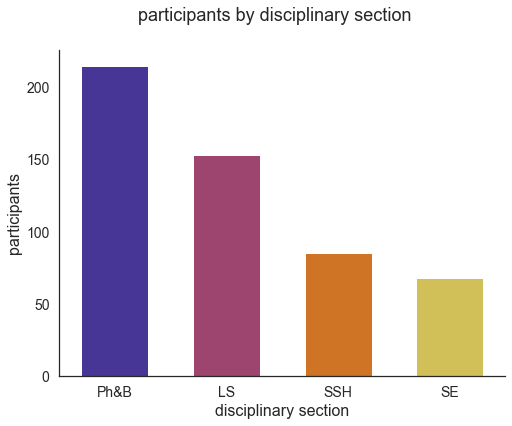

In [59]:
# create bar chart with adjusted column width

# adjust column width

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='disciplinary section', y='participants', data=df_participants_by_section, palette = 'CMRmap') # color_palette("husl", 9) #color='deepskyblue')

#ax.set_xticklabels(df_participants_by_section['disciplinary section'], rotation=40, ha='right')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('disciplinary section', fontsize=16)
plt.ylabel('participants', fontsize=16)
plt.suptitle('participants by disciplinary section', fontsize=18)
sns.despine()

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # change the bar width
        patch.set_width(new_value)

        # recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .60)

plt.savefig('../figures/barchart_participants_by_section.png', dpi=300)



In [60]:
# Create df with participants by professional role ('car1')
# quite a lot of missing data

df_career = pd.DataFrame(df_digitalskills['car1'].value_counts())
df_career.reset_index (inplace = True)
df_career.rename(columns = {'index': 'career', 'car1': 'participants'}, inplace = True)
df_career.head()

,career,participants
0,Graduate Student,208
1,Postdoctoral Researcher,77
2,Research Staff,72
3,Research Software Engineer,30
4,Faculty,26


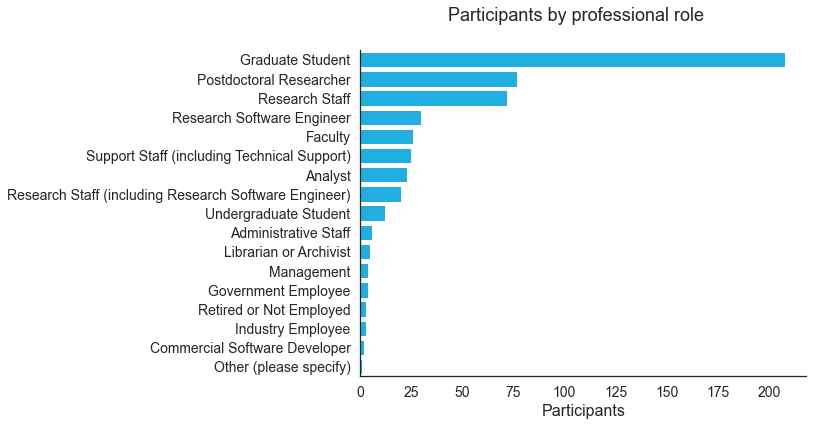

In [61]:
# save figure

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='participants', y='career', data= df_career, color='deepskyblue')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Participants', fontsize=16)
plt.ylabel("", fontsize=16)
plt.suptitle('Participants by professional role', fontsize=18)
sns.despine()
    
plt.savefig('../figures/horiz_barchart_participants_by_professional_role.png', dpi=300, bbox_inches="tight")


In [62]:
# these roles are not consistent. repeat with updated dataset

df2 = pd.read_csv("../data/all_event_data-rse_grouped.csv")

In [63]:
df2["org_id"].fillna("NLeSc", inplace = True)

In [65]:
# select only digital skills events and exclude NLeSc participants

# filter out escience employees
df2_external = df2[df2['affiliation'] != 'ESCIENCE CENTER']
df2_external['affiliation'].value_counts()

TU DELFT                                    103
UVA                                          93
UTRECHT UNIVERSITY                           77
VU AMSTERDAM                                 60
WAGENINGEN UNIVERSITY                        48
                                           ... 
RWTH AACHEN                                   1
LA SAPIENZA UNIVERSITY                        1
AMSTERDAM UNIVERSITY OF APPLIED SCIENCES      1
UNIVERSITY OF MICHIGAN                        1
ROBOVALLEY                                    1
Name: affiliation, Length: 85, dtype: int64

In [66]:
# select digital skills events only

# only escience events
df2_escience = df2_external[(df2_external['org_id'] == 'NLeSc') | (df2_external['org_id'] == 'ePlan')]

# filter out the escience symposia
df2_digitalskills = df2_escience[df2_escience['event'].str.contains('Symposium') == False]

# filter out the workshop on software management plans
df2_digitalskills = df2_digitalskills[df2_digitalskills['event'].str.contains('Software Management Plans') == False]

df2_digitalskills['org_id'].value_counts()

NLeSc    776
ePlan     35
Name: org_id, dtype: int64

In [67]:
# Create df with participants by professional role ('car1')
# quite a lot of missing data

df2_career = pd.DataFrame(df2_digitalskills['car1'].value_counts())
df2_career.reset_index (inplace = True)
df2_career.rename(columns = {'index': 'career', 'car1': 'participants'}, inplace = True)
df2_career.head()

,career,participants
0,Graduate Student,208
1,Research Staff,92
2,Postdoctoral Researcher,77
3,Research Software Engineer,30
4,Faculty,26


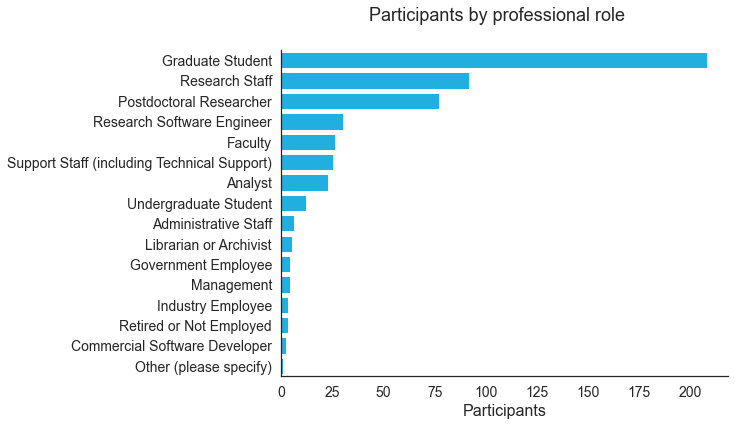

In [68]:
# save figure

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='participants', y='career', data= df2_career, color='deepskyblue')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Participants', fontsize=16)
plt.ylabel("", fontsize=16)
plt.suptitle('Participants by professional role', fontsize=18)
sns.despine()
    
plt.savefig('../figures/horiz_barchart_participants_by_professional_role.png', dpi=300, bbox_inches="tight")

In [ ]:
# now try to make a stacked bar chart for the total digital skills events and participants
# use event_id to count events, and 